In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import os

from glob import glob
import seaborn as sns

import numpy as np
import pandas as pd

from xskillscore import rmse

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean

import holoviews as hv
from holoviews import opts, dim

import geoviews as gv
import geoviews.feature as gf
from cartopy import crs

gv.extension('bokeh')

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [ ]:
variables = ['dtr', 'pr', 'pr90', 'tas'] # variables in alphabetical order

# Get the observed data
Y = xr.open_dataset('results/validations/outputs_ssp245.nc')

# rename diundamental temperature range to dtr for consistency
Y = Y.rename({'diurnal_temperature_range': 'dtr'})

# Convert the precip values to mm/day
Y["pr"] *= 86400
Y["pr90"] *= 86400
Y = Y.mean('member')
NorESM_data = {
    var: Y[var] for var in variables
}

In [ ]:
def get_plot(var):
    d_name = {
        'tas': 'Temperature',
        'dtr': 'Diurnal temperature range',
        'pr': 'Precipitation',
        'pr90': '90th percentile of precipitation'
    }
    d_kwargs = {
        'tas': dict(cmap="coolwarm", clim=(-5, 5)),
        'dtr': dict(cmap="coolwarm", clim=(-2, 2)),
        'pr': dict(cmap="BrBG", clim=(-4, 4)),
        'pr90': dict(cmap="BrBG", clim=(-8, 8))
    }
    d_labels = {
        'tas': "Temperature (K)",
        'dtr': "Diurnal temperature range (K)",
        'pr': "Precipitation (mm/day)",
        'pr90': "Extreme precipitation (mm/day)"
    }
    ds = gv.Dataset(Y[var], ['lon', 'lat', 'time'], var, crs=crs.PlateCarree())

    hv.output(widget_location='bottom')

    coastline = gf.coastline().opts(projection=ccrs.Robinson())

    im = ds.to(gv.Image, ['lon', 'lat'], var, dynamic=True)\
        .opts(colorbar=True, width=800, height=500, title=f'Mean {d_name[var]} in {d_labels[var]}', **d_kwargs[var])
    
    return im * coastline

In [ ]:
dmap = hv.DynamicMap(get_plot, kdims=['var']).redim.values(Dataset=['tas', 'pr', 'dtr', 'pr90'])

In [ ]:
# hv.save(dmap['pr90'], 'results/figures/pr90_mean_maps', fmt='html')

## Make 3 models result graph

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import os

from glob import glob
import seaborn as sns

import numpy as np
import pandas as pd

import warnings
from xskillscore import rmse
import cartopy

warnings.filterwarnings("ignore")

In [17]:
tas_data_gp = xr.open_dataarray('/Users/jack/Library/CloudStorage/GoogleDrive-limjackailjk@gmail.com/Other computers/My Laptop/UCSD/DSC/DSC180/ClimateBench - Plus/ClimateBench-Plus/DKL Gaussian Process/results/final_results/Final-dkl-mean-tas.nc')
tas_data_xgb = xr.open_dataarray('/Users/jack/Library/CloudStorage/GoogleDrive-limjackailjk@gmail.com/Other computers/My Laptop/UCSD/DSC/DSC180/ClimateBench - Plus/ClimateBench-Plus/XGBoost/results/xgboost_predicted_tas.nc')
tas_data_PINN = xr.open_dataarray('/Users/jack/Library/CloudStorage/GoogleDrive-limjackailjk@gmail.com/Other computers/My Laptop/UCSD/DSC/DSC180/ClimateBench - Plus/ClimateBench-Plus/PINN/results/outputs_ssp245_predict_tas.nc')

model_data = [tas_data_gp, tas_data_xgb, tas_data_PINN]

In [18]:
variables = 'tas'
variables_names = 'Temperature'
labels = "Temperature (K)"
kwargs = dict(cmap="coolwarm", vmax=6)
models = ['DKL Gaussian Process', 'XGBoost', 'PINN']

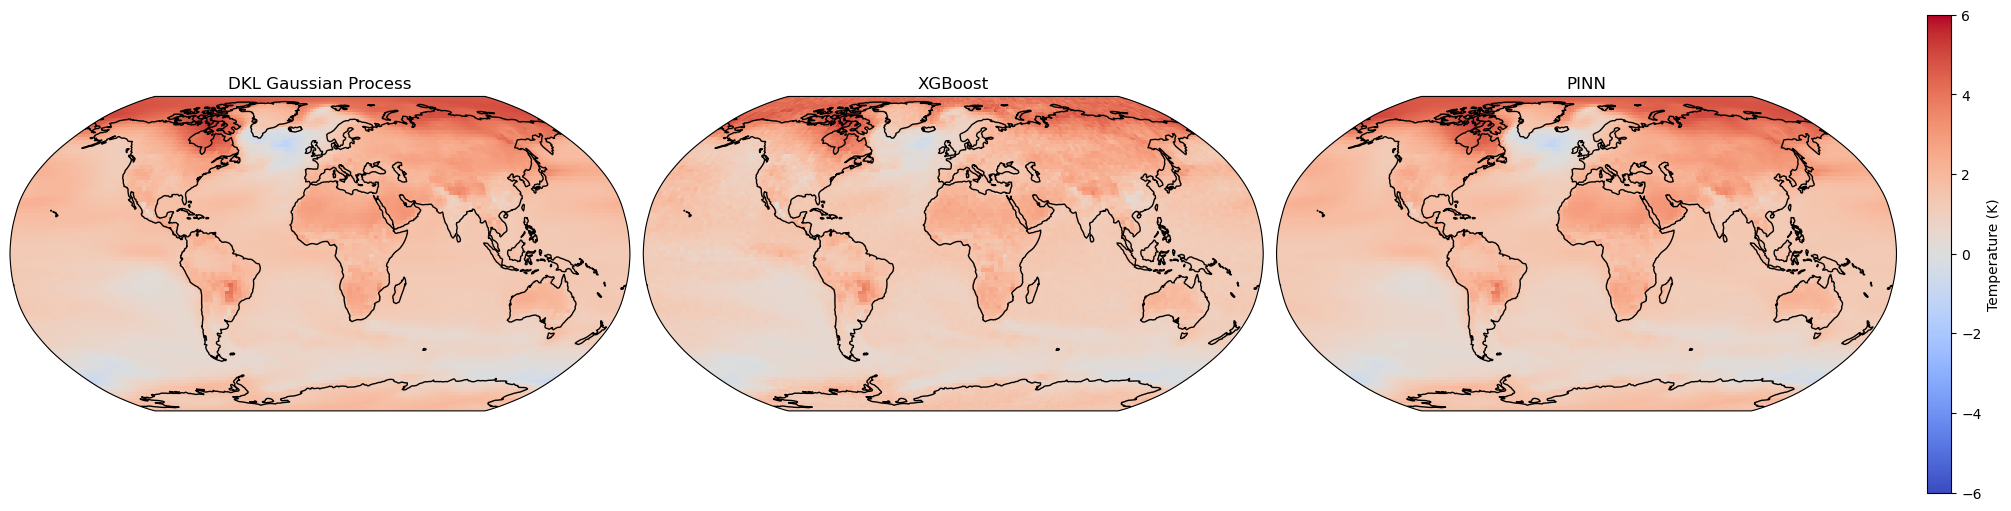

In [23]:
# Plot results one for each variable comparing with the observed data and reproduction 
fig, axes = plt.subplots(1, 3, figsize=(20, 5), subplot_kw={"projection": ccrs.Robinson()},constrained_layout=True)

for i, data in enumerate(model_data):
    ax = axes[i]
    ax.coastlines()
    ax.set_global()
    ax.set_title(models[i])
    # Plotting the data
    if i == 2:
        data.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), add_labels=False, cbar_kwargs={"label":labels, "orientation":'vertical'}, **kwargs)
    else:
        data.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), add_labels=False, add_colorbar=False, **kwargs)